In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use(['ggplot'])

## Create data

In [16]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [17]:
X[:10]

array([[1.88366473],
       [1.96067317],
       [1.7213209 ],
       [1.52492074],
       [1.80738911],
       [1.05541441],
       [1.01233709],
       [0.81090229],
       [0.96157099],
       [1.37701141]])

In [18]:
y[:10]

array([[ 9.03654713],
       [10.63125839],
       [ 8.68715273],
       [10.61361734],
       [ 8.60051454],
       [ 6.43371403],
       [ 7.4578337 ],
       [ 5.76785831],
       [ 6.48780525],
       [ 8.97849335]])

### Plot the data

[0, 2, 0, 15]

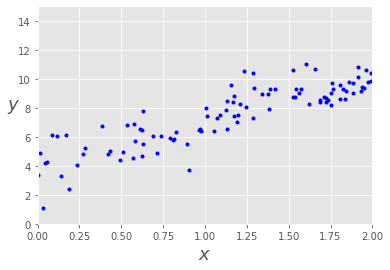

In [19]:
plt.plot(X, y, 'b. ')
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

### Analytical way of Linear Regression

In [27]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.9754948 ],
       [3.10919887]])

In [28]:
X_b[:10]

array([[1.        , 1.88366473],
       [1.        , 1.96067317],
       [1.        , 1.7213209 ],
       [1.        , 1.52492074],
       [1.        , 1.80738911],
       [1.        , 1.05541441],
       [1.        , 1.01233709],
       [1.        , 0.81090229],
       [1.        , 0.96157099],
       [1.        , 1.37701141]])

In [29]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.9754948 ],
       [10.19389255]])

###  Let's plot prediction line with calculated:theta

[0, 2, 0, 15]

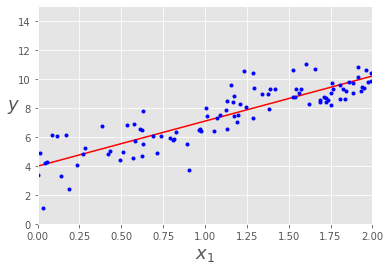

In [30]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b. ')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

### Gradient Descent

#### Cost Function

In [31]:
def cal_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2 * m) * np.sum(np.square(predictions-y))
    return cost

#### Gradients

In [32]:
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    for it in range(iterations):
        
        prediction = np.dot(X, theta)
        theta = theta - (1/m) * learning_rate * (X.T.dot((prediction - y)))
        theta_history[it, :] = theta.T
        cost_history[it] = cal_cost(theta, X, y)
    
    return theta, cost_history, theta_history

### Let's start with 1000 iterations and a learning rate of 0.01. Start with theta from a Gaussian distribution

In [33]:
lr = 0.01
n_iter = 1000

theta = np.random.randn(2, 1)

X_b = np.c_[np.ones((len(X), 1)), X]
theta, cost_history, theta_history = gradient_descent(X_b, y, theta, lr, n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.002,
Theta1:          3.089
Final cost/MSE:  5369.135


### Let's plot the cost history over iterations

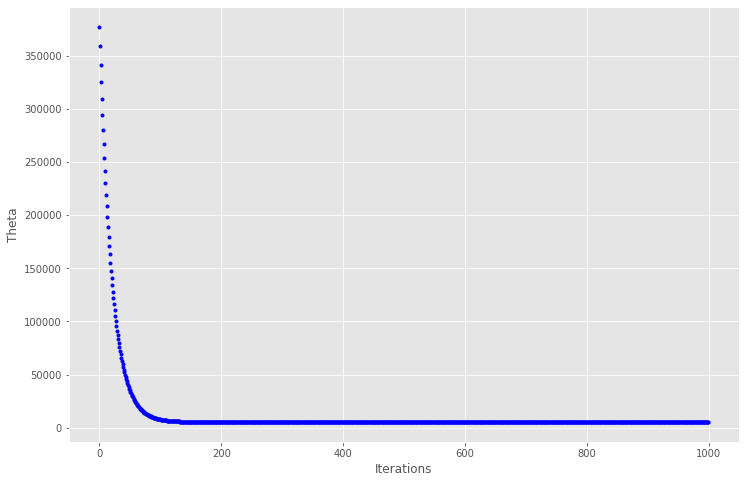

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_xlabel('Iterations')
ax.set_ylabel('Theta')

ax.plot(range(n_iter), cost_history, 'b.')

### After around 130 iterations the cost is flat so the remaining iterations are not needed

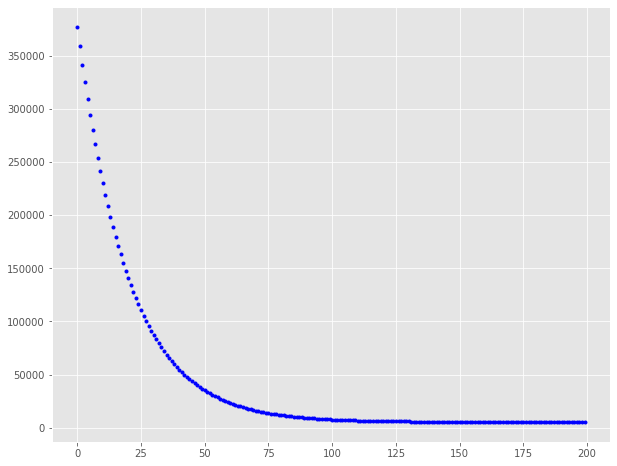

In [38]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

### Let us build a function which can show the effects together and also show how gradient decent actually is working

In [39]:
def plot_GD(n_iter, lr, ax, ax1=None):
    _ = ax.plot(X,y,'b.')
    theta = np.random.randn(2,1)

    tr =0.1
    cost_history = np.zeros(n_iter)
    for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
    if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

### Plot the graphs for different iterations and learning rates combination

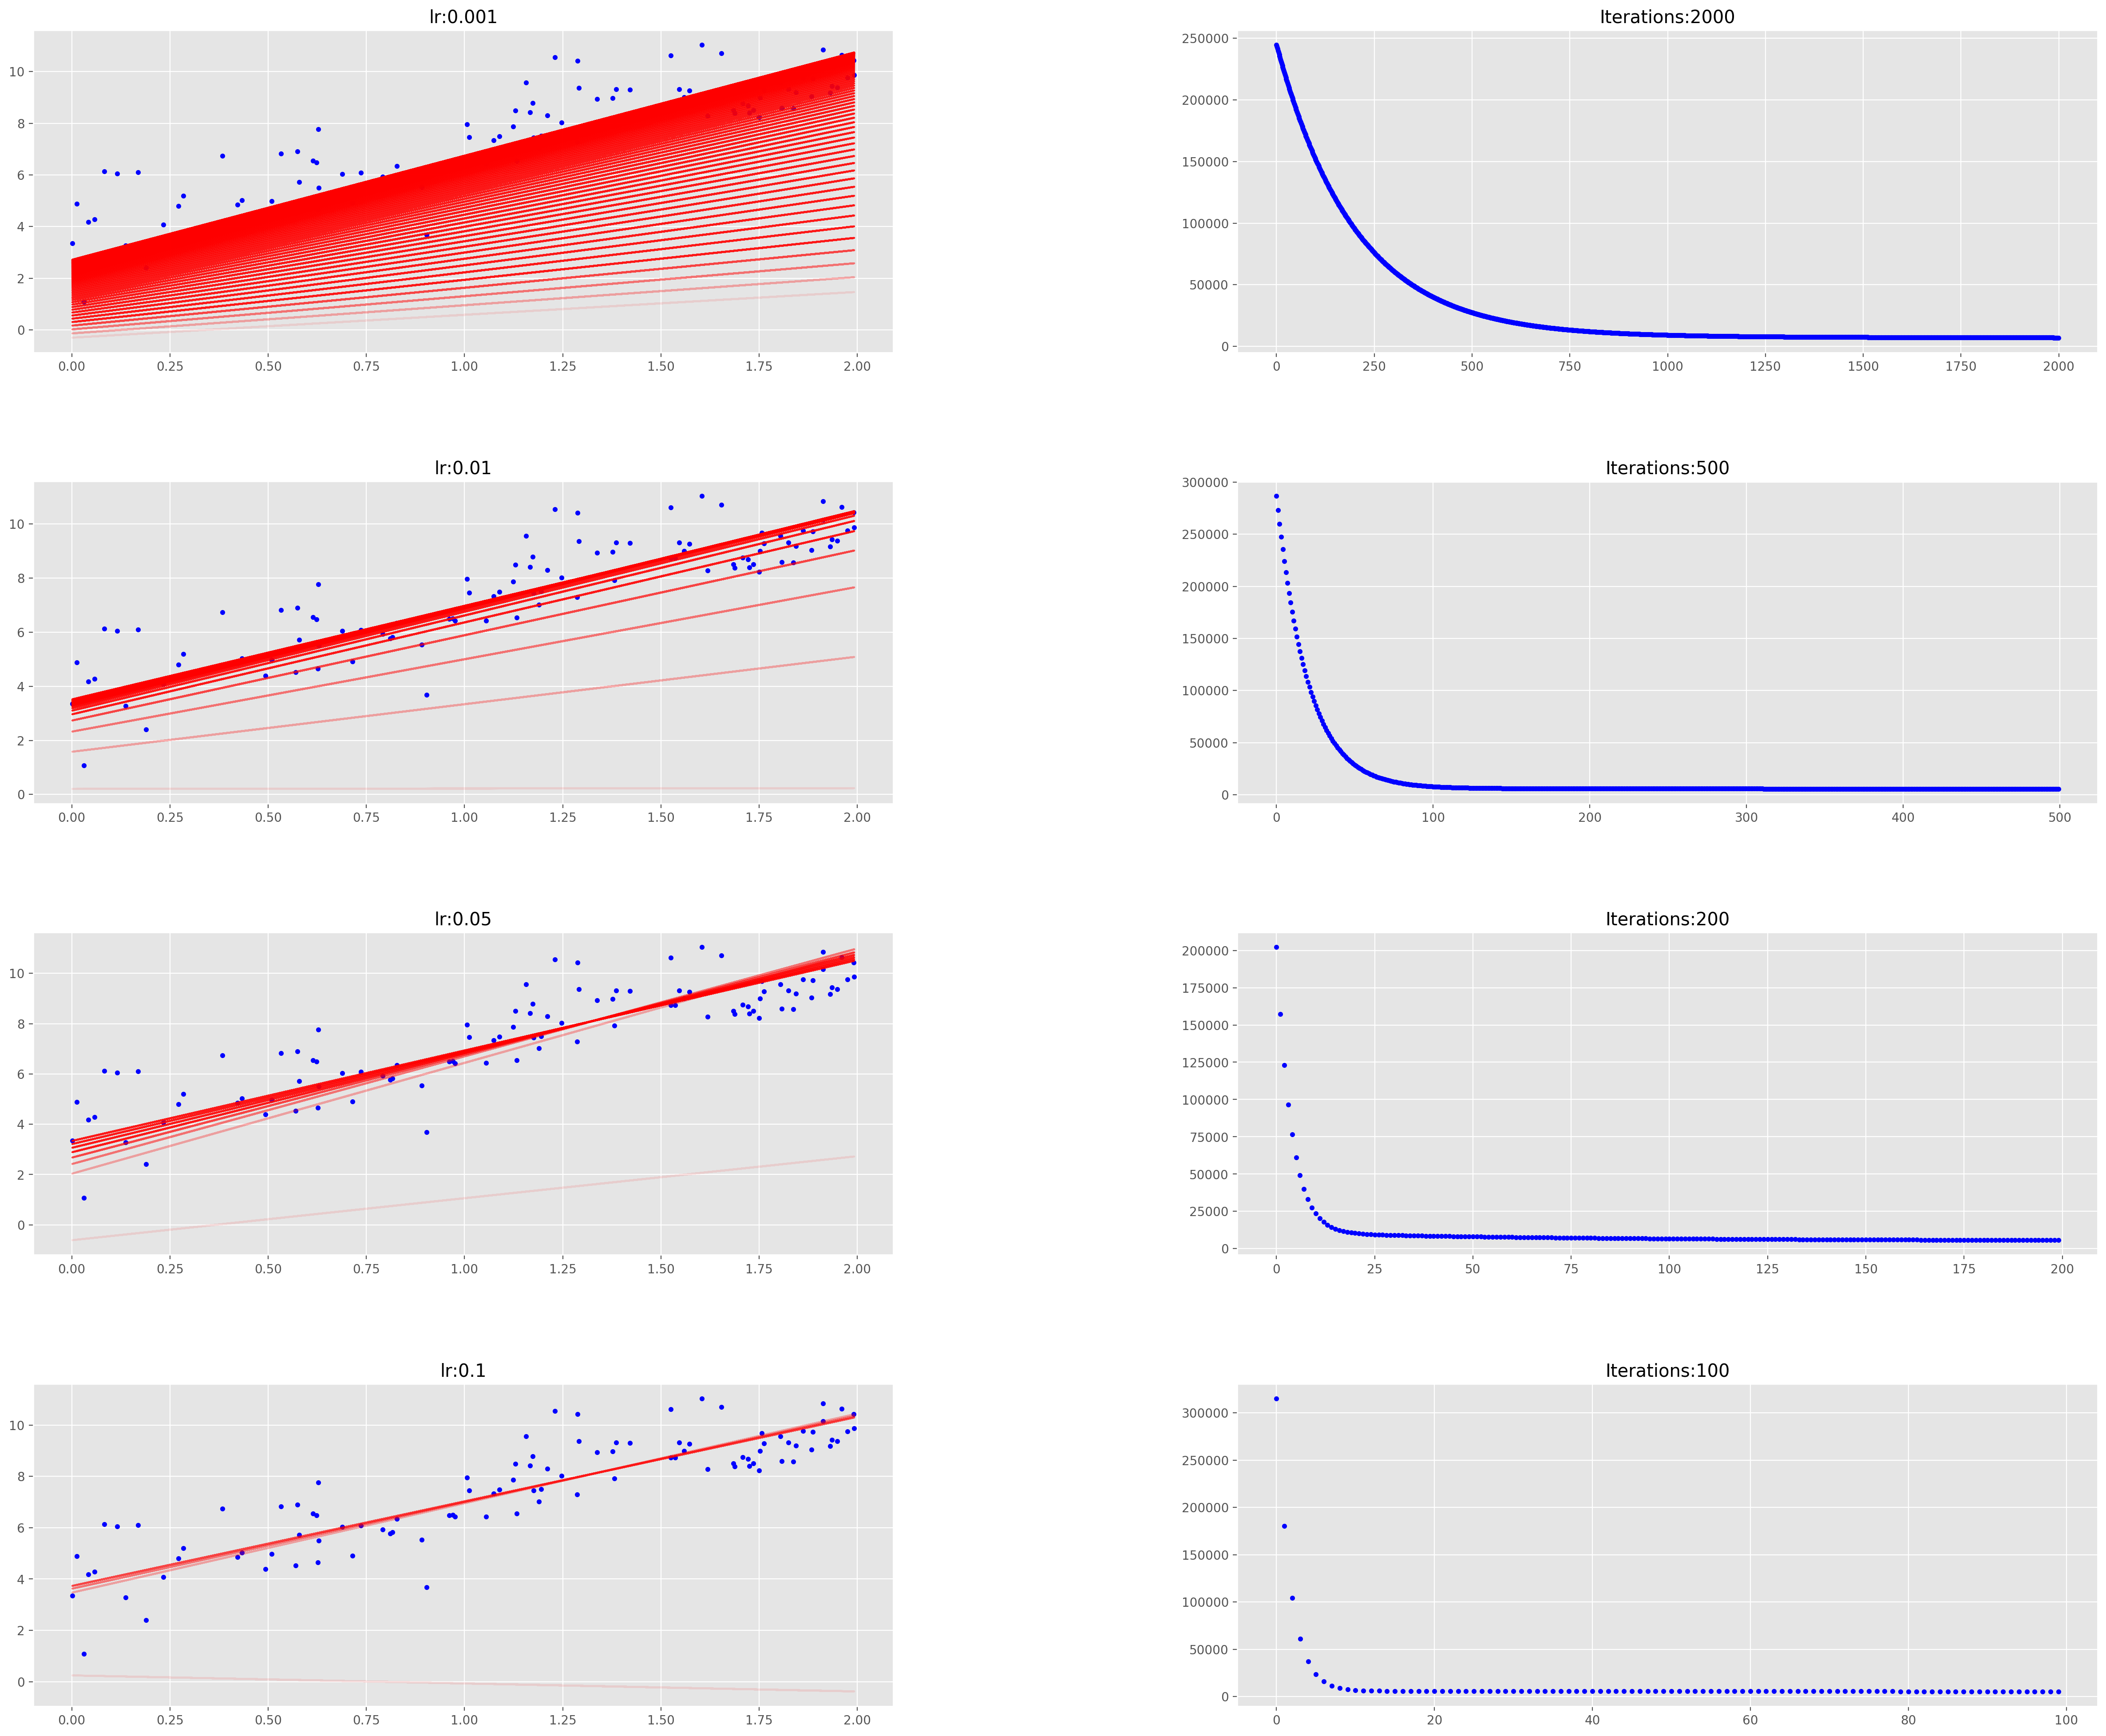

In [40]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)

### Plot Indiviual graphs to zoom in

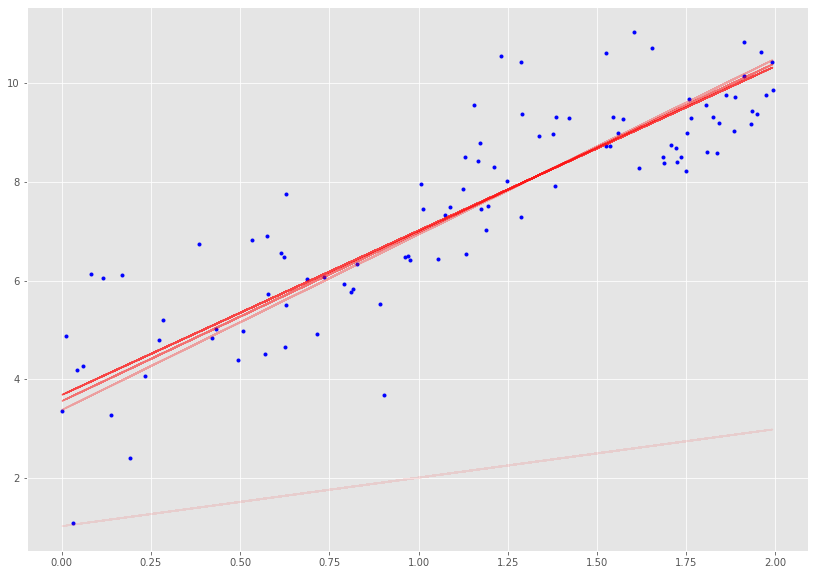

In [41]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.1,ax)